In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import PIL.Image
import networkx as nx
import pandas as pd
import string

from functions.genome_topology import open_pdb
from functions.genome_topology import select_chrom
from functions.genome_topology import geom_distance
from functions.genome_topology import make_graph
from functions.genome_topology import fractal_dimension
from functions.genome_topology import get_matrix
from functions.genome_topology import normalize_psc
from functions.plotting_tools import set_layout

## CIRCUIT TOPOLOGY ANALISIS OF CHROMOSOME 3D STRUCTURES

This notebook processes 3D structures of chromosomes (in PDB format) to extract topological parameters such as:
- CT parameters (percentage of series, parallel and cross, number of contacts) 
- Network clustering coefficient
- Fractal dimension (calculated over the CT topology matrix)

First, the PDB structures are processed in order to find spatial contacts. A spatial cutoff needs to be defined for contact selection (suggested range of values: 1.0-2.0). Chromosome ID is expressed as letters (ex: 'chr a'). It is possible to save the topology matrix in TIF format, and the topological parameters in csv format.

Choose paramters: cell number, cutoff radius and number of neighbors to exclude from the analysis

In [20]:
path = 'data/pdbs/cell1'
r_cutoff=1.0
neighbours=1
set_layout()
   
chr_vec=np.array(['chr a', 'chr b', 'chr c','chr d', 'chr e', 'chr f', 'chr g', 'chr h', 'chr i', 'chr j', 'chr k', 'chr l',
        'chr m', 'chr n', 'chr o', 'chr p', 'chr q', 'chr r', 'chr s', 'chr t'])

n_chrom=len(chr_vec)
cell=path[-5: len(path)]

print('analyzing {} {}'.format(cell[:-1], cell[-1:]))

analyzing cell 1


### PROCESS SINGLE CHROMOSOME

In [44]:
save_data= True
save_matrix= True
path_savematrix='results/matrices'
path_savedata='results/CT parameters'

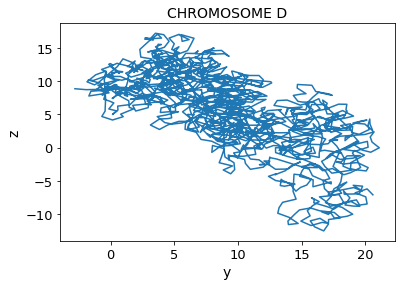

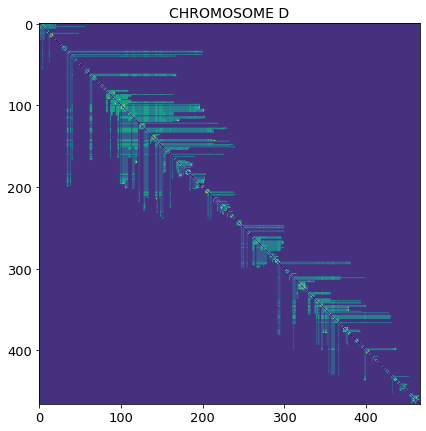

In [46]:
#Choose chromosome
chosen_chr=3 

#Find contacts
n, coord= select_chrom(chosen_chr, path)
dist, n_contact, index=geom_distance(coord, r_cutoff, neighbours)

#Extract topological parameters
mat, stats = get_matrix(index,chr_vec[chosen_chr])
P, S, X=normalize_psc(stats, len(index))
Dim_fractal, r2=fractal_dimension(mat, plot_fig=0)

#Build network and calculate clustering coefficient
G=make_graph(index)
clustering= nx.average_clustering(G)

#plot figures
#Plot 2D projections of chromosome choordinate
plt.figure()
plt.plot(coord[:,0], coord[:,2])
plt.title('CHROMOSOME {}'.format(chr_vec[chosen_chr][-1:].upper()))
plt.xlabel('y')
plt.ylabel('z')

#Plot topology matrix
plt.figure(figsize=(7, 7))
plt.imshow(mat)
plt.title('CHROMOSOME {}'.format(chr_vec[chosen_chr][-1:].upper()))


#Save data
if save_data:
    topology_parameters = {'P':[P], 'S':[S], 'X':[X], 'N contacts': [len(index)],
                           'Fractal dimension':[Dim_fractal], 'r squared': [r2], 'Clustering': [clustering]}
    topology_parameters= pd.DataFrame(topology_parameters)
    
    topology_parameters.to_csv('{}/Top_parameters_{}_{}.csv'.format(path_savedata, cell, chr_vec[chosen_chr]))
    
#Store topology matrix in TIF file
if save_matrix:
    PIL.Image.fromarray(mat.astype(float)).save("{}/top_matrix_{}_{}.tif".format(path_savematrix,
                                                                                 cell, chr_vec[chosen_chr]))

# PROCESS ALL CHROMOSOMES IN A CELL

Loop over all chromosomes in a cell

In [50]:
save_data= True
save_matrix= True
plot_matrix=True
path_savematrix='results/matrices/{}'.format(cell)
path_savedata='results/CT parameters'

Retrieve chromosome coordinates 

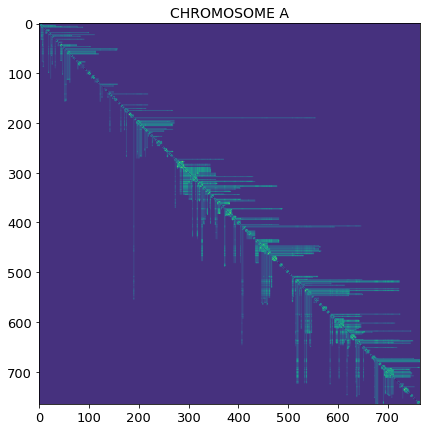

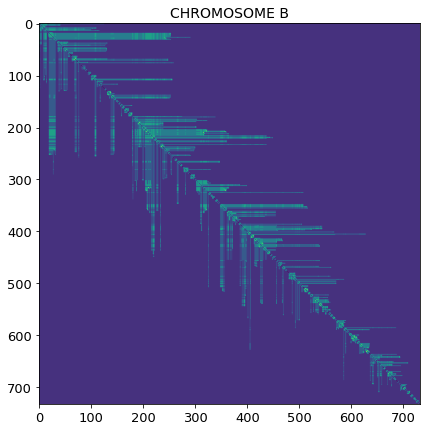

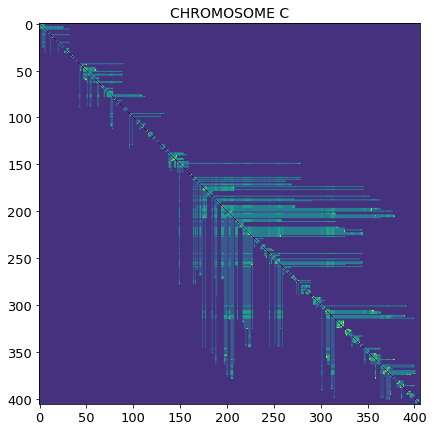

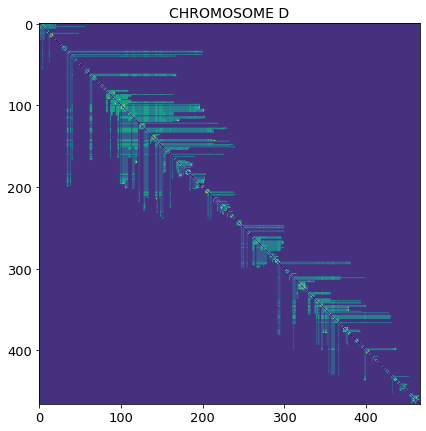

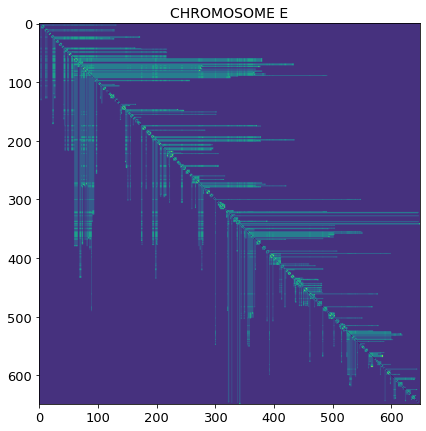

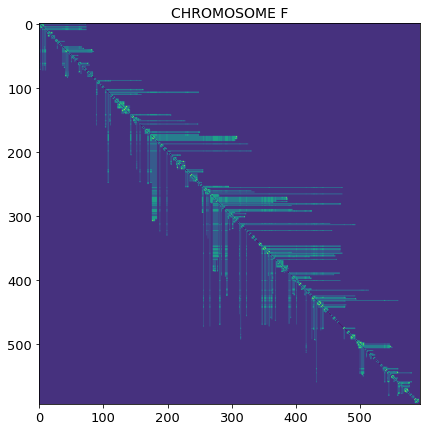

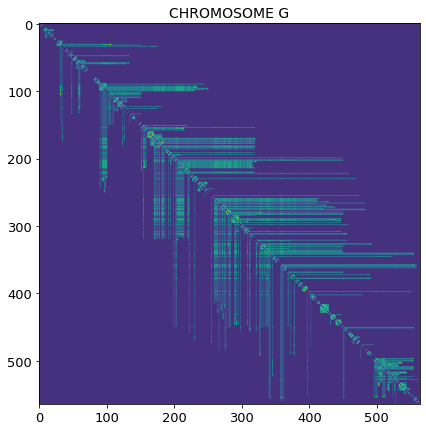

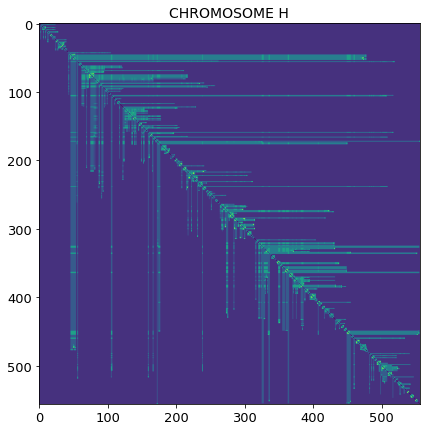

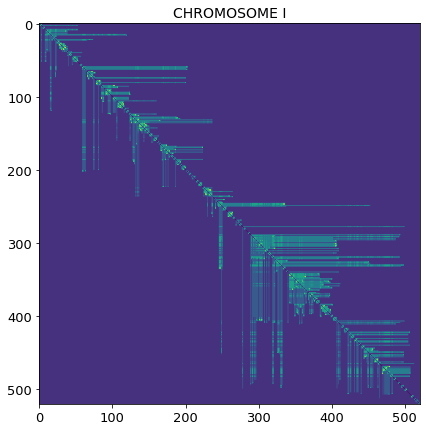

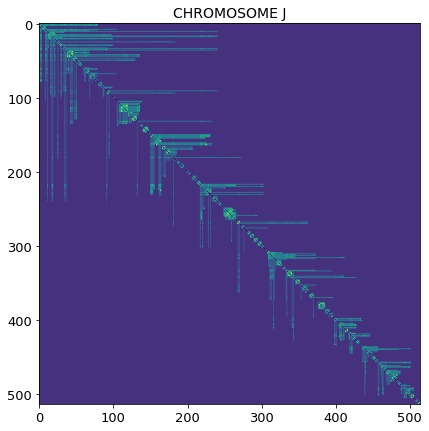

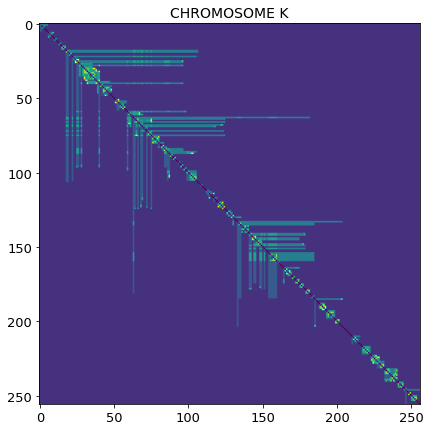

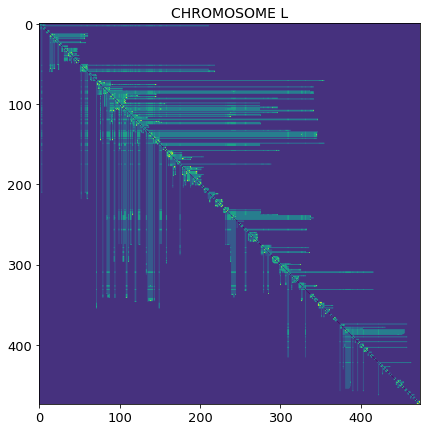

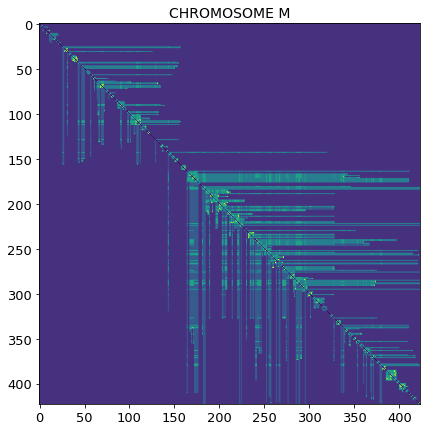

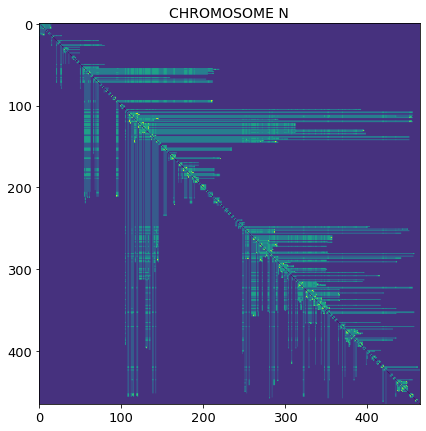

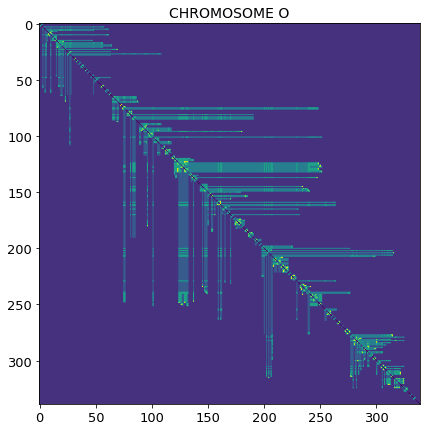

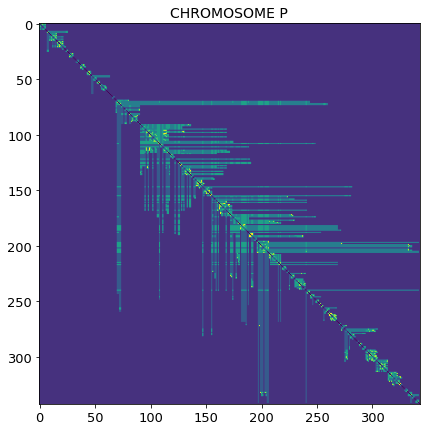

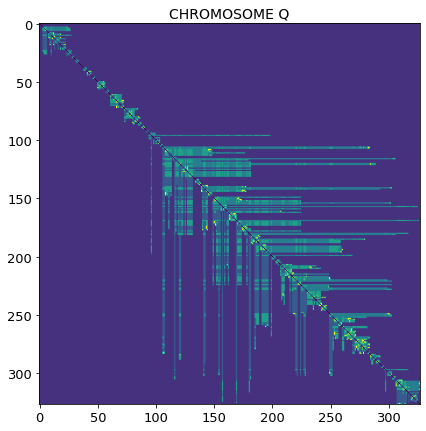

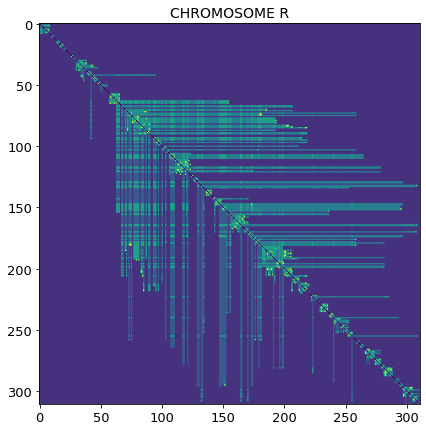

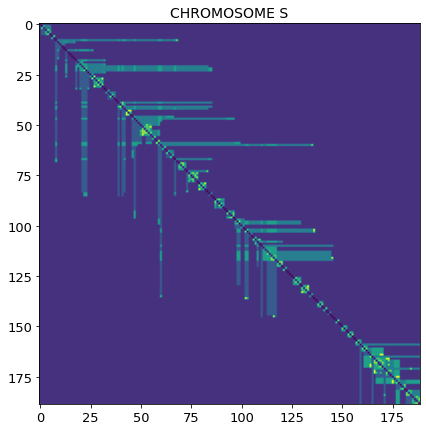

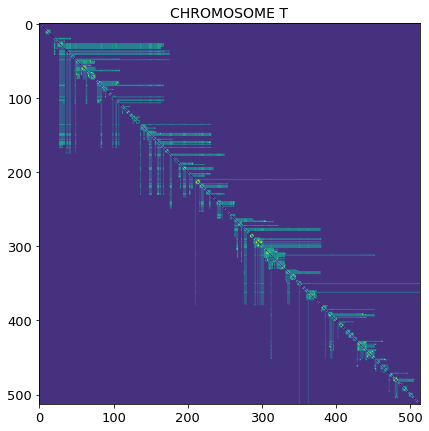

In [51]:
P=np.zeros(n_chrom)
S=np.zeros(n_chrom)
X=np.zeros(n_chrom)
N_contacts=np.zeros(n_chrom)
Dim_fractal=np.zeros(n_chrom)
r2_fractalfit=np.zeros(n_chrom)
clustering=np.zeros(n_chrom)

for t in range(n_chrom):
    n, coord= select_chrom(t, path)
    dist, n_contact, index=geom_distance(coord, r_cutoff, neighbours)
    mat, stats = get_matrix(index,chr_vec[0])
    P[t], S[t], X[t]=normalize_psc(stats, len(index))
    N_contacts[t]=len(index)
    Dim_fractal[t], r2_fractalfit[t]=fractal_dimension(mat, plot_fig=0)
    G=make_graph(index)
    clustering[t]= nx.average_clustering(G)
    
    if plot_matrix:
        plt.figure(figsize=(7, 7))
        plt.imshow(mat)
        plt.title('CHROMOSOME {}'.format(chr_vec[t][-1:].upper()))
    
    if save_matrix:
        PIL.Image.fromarray(mat.astype(float)).save("{}/top_matrix_{}_{}.tif".format(path_savematrix,
                                                                                 cell, chr_vec[t]))
if save_data:
    topology_parameters = {'P':P, 'S':S, 'X':X, 'N contacts': N_contacts,
                           'Fractal dimension':Dim_fractal, 'r squared': r2_fractalfit, 
                           'Clustering': clustering}
    
    topology_parameters= pd.DataFrame(topology_parameters)
    
    topology_parameters.to_csv('{}/Top_parameters_{}.csv'.format(path_savedata, cell))

